In [ ]:
# Rewriting this as script for compressing a ppt file I want to be able to upload on indeed
# Allows for SVD approx on RGB images now

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import numpy.linalg as alg
from scipy.linalg import diagsvd

In [6]:
os.getcwd()
os.chdir(r'C:\Users\schuy\Pictures')

In [11]:
#path = 'camellia_garden.jpg'
imgs = os.listdir(os.getcwd())
plt.imread('camellia_garden.jpg')

array([[[106, 100,  88],
        [ 88,  78,  66],
        [ 87,  80,  62],
        ...,
        [193, 107, 156],
        [198, 111, 156],
        [189, 103, 138]],

       [[ 70,  68,  56],
        [ 74,  67,  57],
        [113, 109,  97],
        ...,
        [206, 117, 163],
        [204, 116, 158],
        [192, 107, 140]],

       [[ 28,  25,  18],
        [ 47,  47,  37],
        [ 87,  87,  77],
        ...,
        [190,  97, 141],
        [196, 104, 143],
        [195, 108, 140]],

       ...,

       [[ 46,  55,  28],
        [ 73,  74,  58],
        [ 69,  64,  58],
        ...,
        [ 11,  13,  12],
        [ 11,  11,  13],
        [ 15,  15,  17]],

       [[ 66,  65,  47],
        [ 75,  71,  60],
        [ 64,  57,  51],
        ...,
        [ 17,  19,  16],
        [ 16,  16,  14],
        [  9,   7,   8]],

       [[ 64,  55,  48],
        [ 63,  54,  47],
        [ 41,  32,  23],
        ...,
        [ 18,  20,  17],
        [ 17,  18,  13],
        [ 13,   9,   8]]

In [ ]:
for n,im in enumerate(imgs):
    x = plt.imread(im)
    r,g,b = x[:,:,0],x[:,:,1],x[:,:,2]
    N,M = r.shape[0],r.shape[1]
    e = []
    for xi in [r,g,b]:
        U,s,Vh = alg.svd(xi)
        S = diagsvd(s,N,M)
        K = 350
        Ax = [sx*np.outer(U[:,i],Vh[i,:]) for sx,i in zip(s,range(K))]
        B = sum(Ax).flatten()
        for i,m in zip(np.nditer(B),range(len(B))):
            if i<0:
                B[m]=0
            if i>1:
                B[m]=1
        e.append(B.reshape(N,M))
    im = np.dstack(e)
    plt.imsave('im{0}.png'.format(n), im)

In [ ]:
## Below is quick n dirty for single greyscaled image, 
## above is iterating through directory of RGB images

(400, 400) (400, 400) (400, 400)


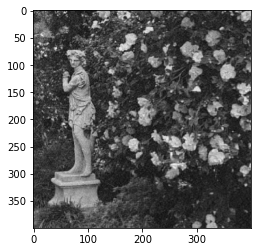

In [30]:
x = plt.imread('camellia_garden.jpg')[:,:,0]
N,M = x.shape[0],x.shape[1]
U,s,Vh = alg.svd(x)
S = diagsvd(s,N,M)
K=100
print(S.shape,U.shape,Vh.shape)
Ax = [sx*np.outer(U[:,i],Vh[i,:]) for sx,i in zip(s,range(K))]
B = sum(Ax).flatten()
plt.imshow(B.reshape(N,M),cmap='gray')

In [17]:
plt.imsave('imgrades.png',B.reshape(N,M),cmap='gray')

In [30]:
np.count_nonzero(B<0)

9992

In [28]:
B[1243064]

-3.169194119496

ModuleNotFoundError: No module named 'cv2'